In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)

C:\Users\John\AppData\Local\Temp\ipykernel_8932\2190567176.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest= session.query(measurement.date).order_by(measurement.date.desc()).first()

print(latest)

('2017-08-23',)


Text(0.5, 0, 'Date')

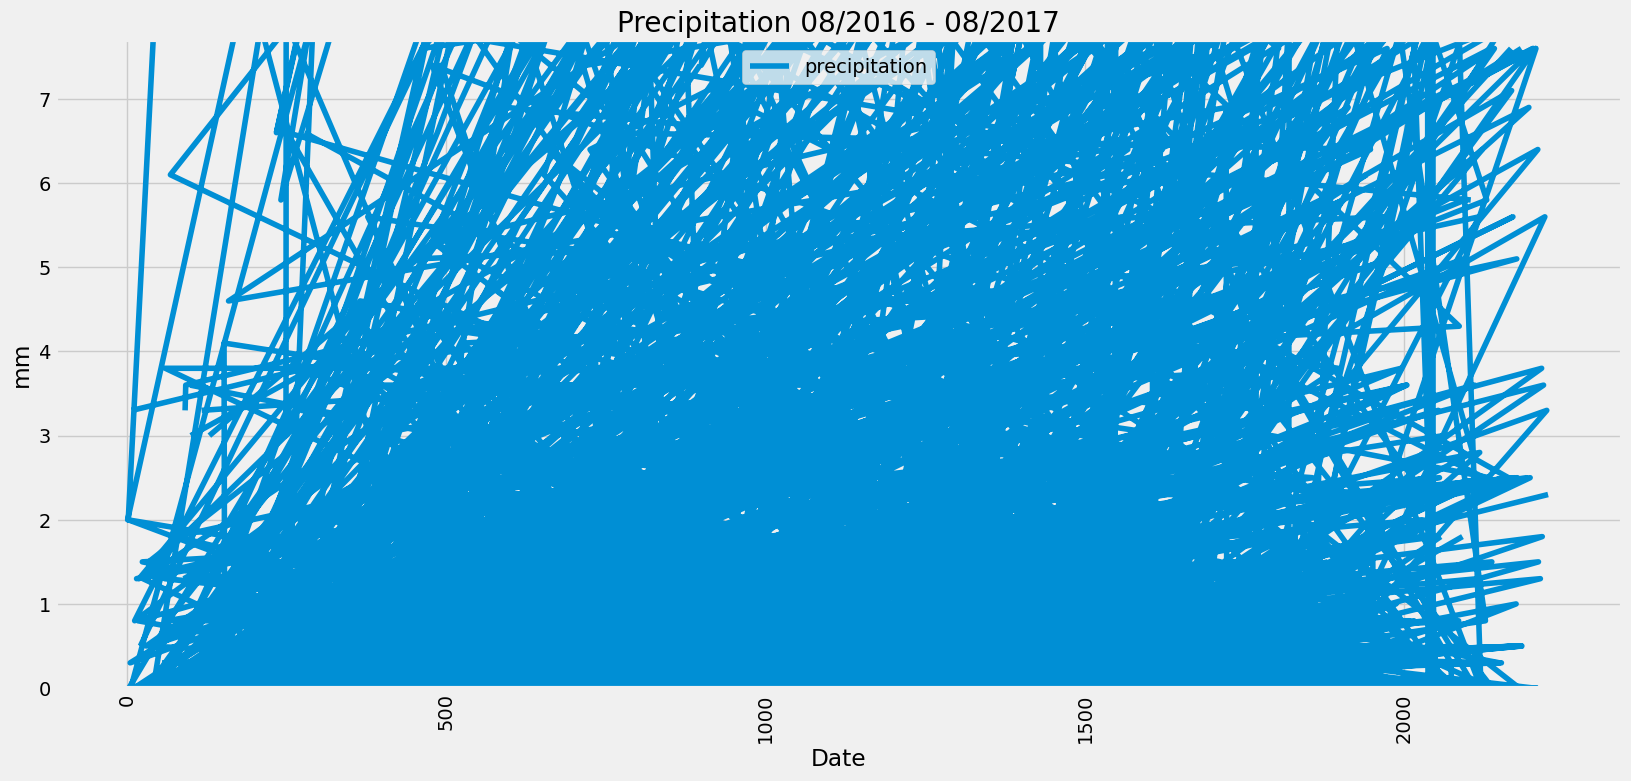

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
latest = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in the dataset.
year = latest - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year).all()

# Save the query results as a Pandas DataFrame
measure = pd.DataFrame(query).rename(
columns={'prcp': 'precipitation'})

# Sort the DataFrame by date
measure = measure.sort_values(by=["date"])

# Use Pandas Plotting with Matplotlib to plot the data
measure.plot(title='Precipitation 08/2016 - 08/2017', figsize=(18, 8), rot=90)
plt.legend(loc='upper center')
plt.ylim(0, 7.7)
plt.ylabel('mm')
plt.xlabel('Date')


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
measure.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station,func.count(measurement.id)]

active = session.query(*sel).\
group_by(measurement.station).\
order_by(func.count(measurement.id).desc()).all()

print(active)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
mostactive = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
print(mostactive)

(12.2, 29.4, 22.03582251082252)


Text(0.5, 0, 'Temperature')

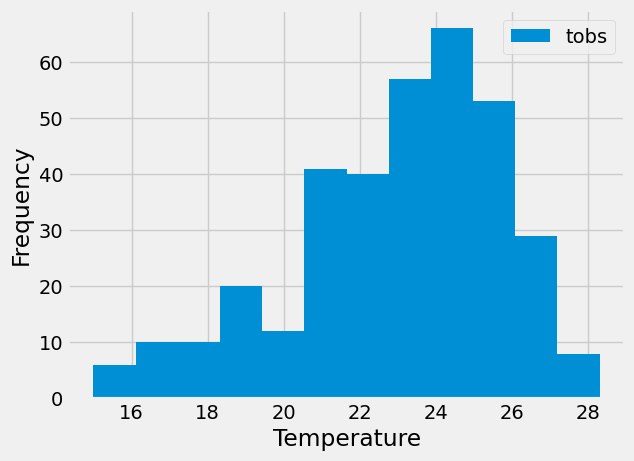

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12 = session.query(measurement.date, measurement.tobs).filter_by(station = "USC00519281").\
    filter(measurement.date >= year).all()

# Create dataframe for plotting histogram
last12df = pd.DataFrame(last12)

# Create the histogram 
last12df.plot(kind = "hist", bins = 12)
plt.xlabel('Temperature')

# Close Session

In [16]:
# Close Session
session.close()